In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving M1_final.csv to M1_final.csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['M1_final.csv']))

In [ ]:
df.shape

(28820, 23)

In [ ]:
df.head(3)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22


In [ ]:
df.isnull().sum()

# Hopsefully, all columns - except the Wind column - have no missing values.

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [3]:
df = df.dropna(axis = 0)

In [ ]:
df.shape

(28818, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  object 
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         28818 no

In [ ]:
Objects = []
for i in df.columns:
  if df[i].dtype == object:
    Objects.append(i)

In [ ]:
print(Objects)

['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Dew Point', 'Wind', 'Condition']


In [ ]:
Floats = []
for flo in df.columns:
  if df[flo].dtype == float:
    Floats.append(flo)

print(Floats)

['Pressure']


In [ ]:
print(df["Pressure"].nunique())

149


In [ ]:
Integers = []
for integer in df.columns:
  if df[integer].dtype == int:
    Integers.append(integer)

print(Integers)


['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'sch_dep', 'sch_arr', 'TAXI_OUT']


In [ ]:
print(df['MONTH'].unique())

[11 12  1]


In [ ]:
print(df['DAY_OF_MONTH'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [ ]:
print(df['DAY_OF_WEEK'].unique())

[5 6 7 1 2 3 4]


In [4]:
print(df.describe(include = 'all'))

               MONTH  DAY_OF_MONTH   DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM  \
count   28818.000000  28818.000000  28818.000000             28818    28818   
unique           NaN           NaN           NaN                 9     2092   
top              NaN           NaN           NaN                B6   N102NN   
freq             NaN           NaN           NaN              9588      108   
mean        7.893955     16.020890      4.008953               NaN      NaN   
std         4.991779      8.750448      1.985299               NaN      NaN   
min         1.000000      1.000000      1.000000               NaN      NaN   
25%         1.000000      8.000000      2.000000               NaN      NaN   
50%        11.000000     16.000000      4.000000               NaN      NaN   
75%        12.000000     24.000000      6.000000               NaN      NaN   
max        12.000000     31.000000      7.000000               NaN      NaN   

         DEST     DEP_DELAY  CRS_ELAPSED_TIME      

In [5]:
df['YEAR'] = 2020

df['DATE'] = df.apply(lambda row: pd.Timestamp(year = row['YEAR'], month = row['MONTH'], day = row['DAY_OF_MONTH']), axis = 1)

In [ ]:
print(df.dtypes)

MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
OP_UNIQUE_CARRIER            object
TAIL_NUM                     object
DEST                         object
DEP_DELAY                     int64
CRS_ELAPSED_TIME              int64
DISTANCE                      int64
CRS_DEP_M                     int64
DEP_TIME_M                    int64
CRS_ARR_M                     int64
Temperature                   int64
Dew Point                    object
Humidity                      int64
Wind                         object
Wind Speed                    int64
Wind Gust                     int64
Pressure                    float64
Condition                    object
sch_dep                       int64
sch_arr                       int64
TAXI_OUT                      int64
YEAR                          int64
DATE                 datetime64[ns]
dtype: object


In [6]:
# Extract day of week
df['day_of_week'] = df['DATE'].dt.dayofweek

In [ ]:
print(df['day_of_week'].head()) # Monday = 0, Sunday = 6

0    6
1    6
2    6
3    6
4    6
Name: day_of_week, dtype: int32


In [7]:
# Extract day of the month
df['day_of_month'] = df['DATE'].dt.day

In [8]:
# Extract month
df['month'] = df['DATE'].dt.month

In [9]:
# Extract day name
df['day_name'] = df['DATE'].dt.day_name()

In [ ]:
print(df['day_name'].head())

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: day_name, dtype: object


In [10]:
# Extract month name
df['month_name'] = df['DATE'].dt.month_name()

In [ ]:
print(df['month_name'].head())

0    November
1    November
2    November
3    November
4    November
Name: month_name, dtype: object


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MONTH              28818 non-null  int64         
 1   DAY_OF_MONTH       28818 non-null  int64         
 2   DAY_OF_WEEK        28818 non-null  int64         
 3   OP_UNIQUE_CARRIER  28818 non-null  object        
 4   TAIL_NUM           28818 non-null  object        
 5   DEST               28818 non-null  object        
 6   DEP_DELAY          28818 non-null  int64         
 7   CRS_ELAPSED_TIME   28818 non-null  int64         
 8   DISTANCE           28818 non-null  int64         
 9   CRS_DEP_M          28818 non-null  int64         
 10  DEP_TIME_M         28818 non-null  int64         
 11  CRS_ARR_M          28818 non-null  int64         
 12  Temperature        28818 non-null  int64         
 13  Dew Point          28818 non-null  object        
 14  Humidity   

# Descriptive Statistics)
1- What are the most common airlines?

In [ ]:
airlines_counts = df['OP_UNIQUE_CARRIER'].value_counts()
print("Most common airlines:")
print(airlines_counts)

Most common airlines:
OP_UNIQUE_CARRIER
B6    9588
DL    7680
9E    4484
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: count, dtype: int64


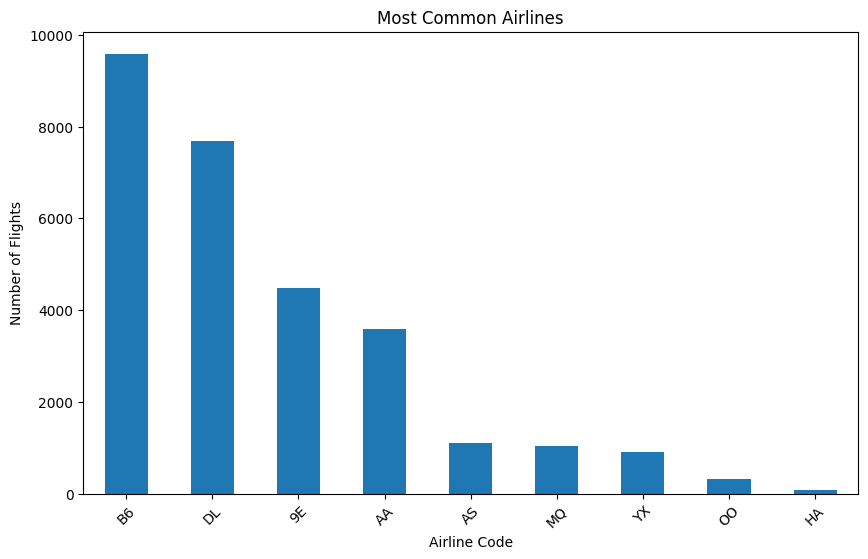

In [ ]:
# Let's visualize it to have a better view:
import matplotlib.pyplot as plt
airlines_counts = df['OP_UNIQUE_CARRIER'].value_counts()

plt.figure(figsize = (10, 6))
airlines_counts.plot(kind = 'bar')
plt.title('Most Common Airlines')
plt.xlabel('Airline Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

2- What are the most common destinations?

In [ ]:
destinations_counts = df['DEST'].value_counts()
print("\nMost common destinations:")
print(destinations_counts)


Most common destinations:
DEST
LAX    2974
SFO    1678
BOS    1243
FLL    1007
MCO     947
       ... 
ABQ      58
PHL      48
RNO      47
EGE      44
JAC       5
Name: count, Length: 65, dtype: int64


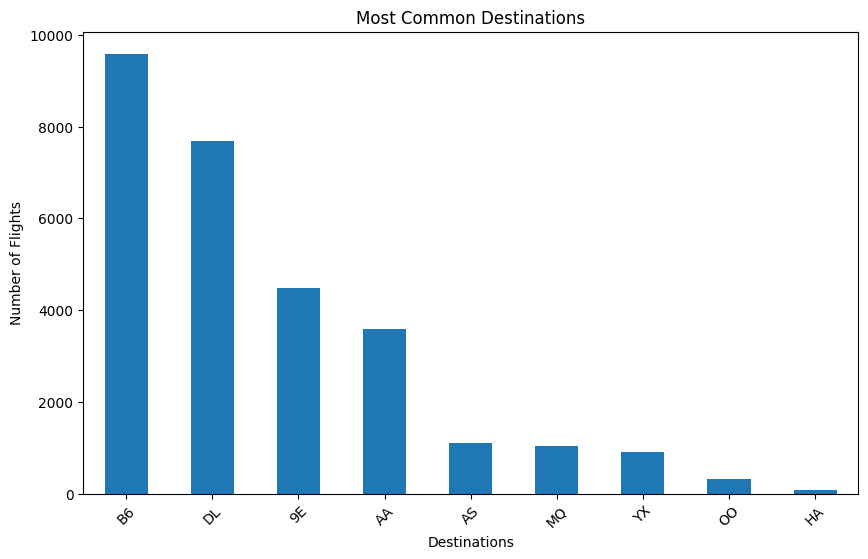

In [ ]:
# Let's visualize the result for a better understanding:
destinations_counts = df['DEST'].value_counts()

plt.figure(figsize = (10, 6))
airlines_counts.plot(kind = 'bar')
plt.title('Most Common Destinations')
plt.xlabel('Destinations')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

3- At which time of the day do the most planes take off?

In [ ]:
# Find the most common departure time in minutes past midnight (DEP_TIME_M)
most_common_dep_time = df['DEP_TIME_M'].mode()[0]

print(f"The most common departure time is around {most_common_dep_time} minutes past midnight")

The most common departure time is around 479 minutes past midnight


# Hypothesis Testing)
In this section, I want to test 3 hypothesis; they are as follows:
1- Flight delays are more common during certain times or days
2- Certain airlines have higher rates of flight cancellations
3- Weather conditions significantly impact flight schedules

In [ ]:
# Hypothesis 1:
# For hypothesis testing, I can use statistical methods such as chi-square and ANNOVA or grouping and aggregating methods. I am choosing the second strategy.
print(df["DEP_DELAY"].dtypes)


int64


In [11]:
# My task is to predict flight delay. To be more precise, model must predict delay degrees; that means: small delay (Up to 10 m), medium delay (15-40 m) and 
# large delay (+40 m). Therefore, I first have to create a multi-class target variable based on the delay time ranges. Let's do it:

# 0: No delay (DEP_DELAY <= 0)
# 1: Small delay (1 <= DEP_DELAY <= 10)
# 2: Moderate delay (11 <= DEP_DELAY <= 30)
# 3: Severe delay (DEP_DELAY > 30)

def classify_delay(delay):
    if delay <= 10:
        return 'small'
    elif 15 <= delay <= 40:
        return 'medium'
    elif delay > 40:
        return 'large'
    else:
        return 'no_delay'

df['DELAY_CATEGORY'] = df['DEP_DELAY'].apply(classify_delay)


In [ ]:
print(df['DELAY_CATEGORY'].unique())

['small' 'medium' 'large' 'no_delay']


# Class Imbalance

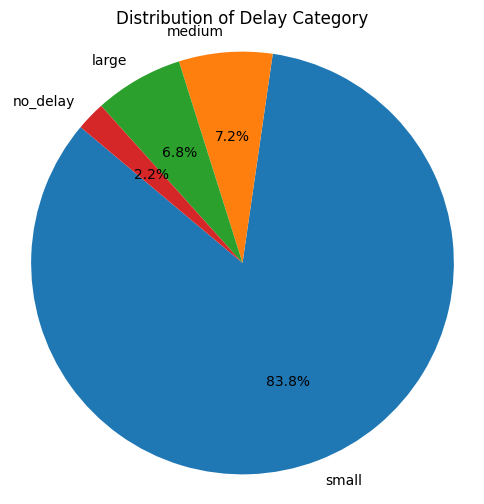

In [ ]:
# Before going any further, let's see if the target column is balanced or not:

value_counts = df['DELAY_CATEGORY'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
plt.pie(value_counts, labels = value_counts.index, autopct = "%1.1f%%", startangle = 140)
plt.title("Distribution of Delay Category")
plt.axis("equal")
plt.show()

# Unfortunately, we see there is a data imbalance in the target column from the pie chart below in which small delay dominates and has a higher amount of 
# percentage.

In [ ]:
import sklearn

In [12]:
# Let's do a custom mapping:
category_to_num = {
    'no_delay': 0,
    'small': 1,
    'medium': 2,
    'large': 3
}
df['DELAY_NUMERIC'] = df['DELAY_CATEGORY'].map(category_to_num)

# Explanation: For testing the hypothesis utilizing groupby method, the DELAY_CATEGORY column must be numeric. So, I'm going to use mapping to map different 
# values to different integers.


In [ ]:
delay_by_day_name = df.groupby('day_name')['DELAY_NUMERIC'].mean()

In [ ]:
delay_by_month_name = df.groupby('month_name')['DELAY_NUMERIC'].mean()

In [ ]:
import seaborn as sns

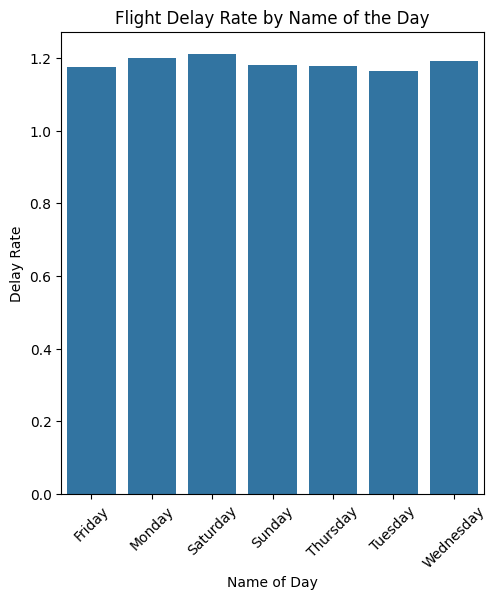

In [ ]:
# Visualize the delay rates to see patterns:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = delay_by_day_name.index, y = delay_by_day_name.values)
plt.xlabel('Name of Day')
plt.ylabel('Delay Rate')
plt.title('Flight Delay Rate by Name of the Day')
plt.xticks(rotation = 45)
plt.show()

# As shown below, all days are approximately close to each other in terms of the flight delay rate, however, saturday and wednesday tend to be a bit higher 
# compared to others.


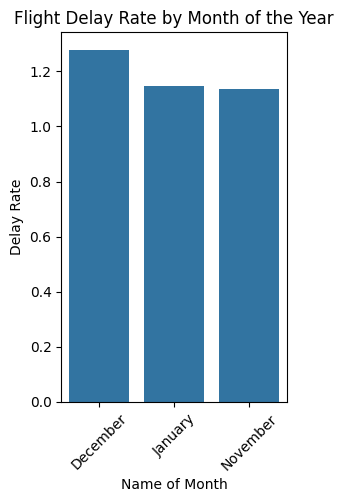

In [ ]:
plt.subplot(1, 2, 2)
sns.barplot(x = delay_by_month_name.index, y = delay_by_month_name.values)
plt.xlabel('Name of Month')
plt.ylabel('Delay Rate')
plt.title('Flight Delay Rate by Month of the Year')
plt.xticks(rotation = 45)
plt.show()

# As we can see, flight delay in December is higher than the other two months.

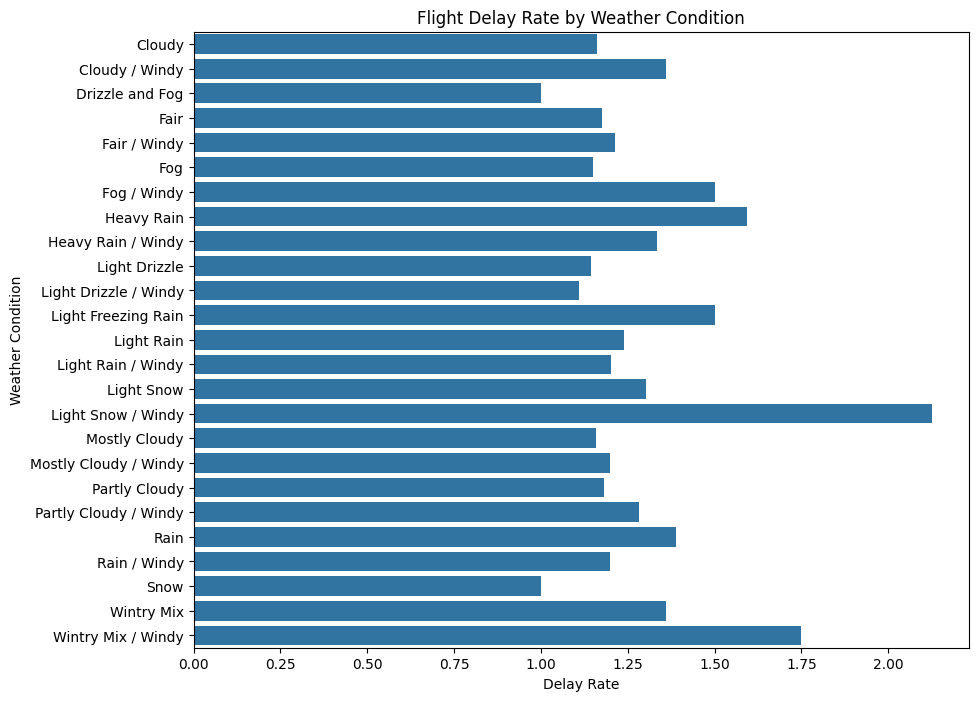

In [ ]:
# Hypothesis 2:
# Weather conditions significantly impact flight schedules.

import seaborn as sns
delay_by_weather_condition = df.groupby('Condition')['DELAY_NUMERIC'].mean()

plt.figure(figsize = (10, 8))
sns.barplot(y = delay_by_weather_condition.index, x = delay_by_weather_condition.values, orient = 'h')
plt.xlabel('Delay Rate')
plt.ylabel('Weather Condition')
plt.title('Flight Delay Rate by Weather Condition')
plt.show()

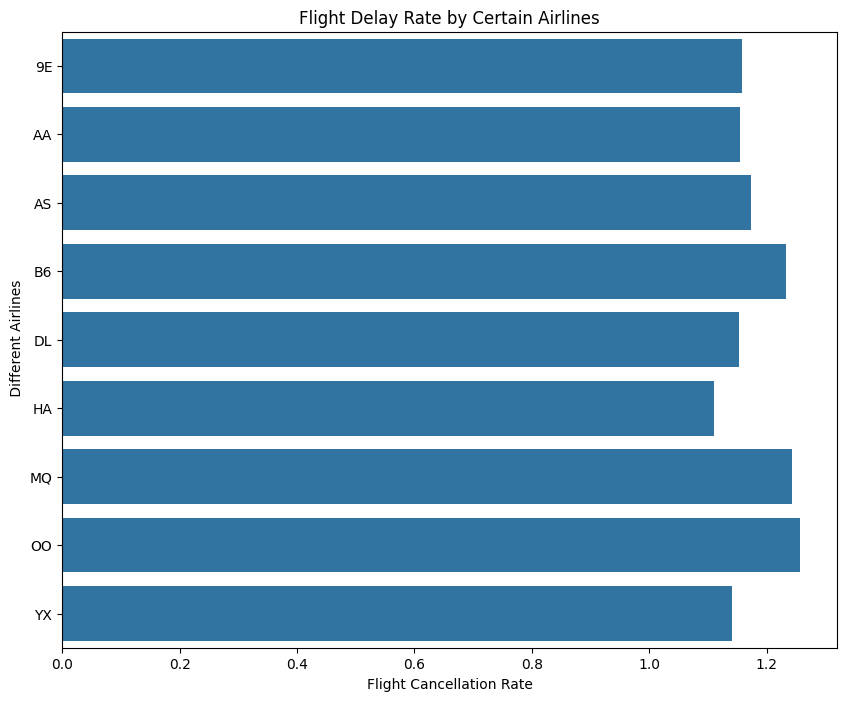

In [ ]:
# Hypothesis 3:
# Certain airlines have higher rates of flight cancellations.

flight_cancellation = df.groupby('OP_UNIQUE_CARRIER')['DELAY_NUMERIC'].mean()

plt.figure(figsize = (10, 8))
sns.barplot(y = flight_cancellation.index, x = flight_cancellation.values, orient = 'h')
plt.xlabel('Flight Cancellation Rate')
plt.ylabel(' Different Airlines')
plt.title('Flight Delay Rate by Certain Airlines')
plt.show()

# B6: JetBlue Airways
# DL: Delta Air Lines
# AA: American Airlines
# AS: Alaska Airlines
# MQ: Envoy Air (formerly American Eagle Airlines)
# 9E: Endeavor Air (formerly Pinnacle Airlines)
# YX: Republic Airways (operates flights for American Eagle)
# HA: Hawaiian Airlines
# OO: SkyWest Airlines

In [13]:
# Let's make a copy of df:
df_one = df.copy()

In [ ]:
Obj = []
for i in df_one.columns:
  if df_one[i].dtype == object:
    Obj.append(i)

print(Obj)

['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Dew Point', 'Wind', 'Condition', 'day_name', 'month_name', 'DELAY_CATEGORY']


In [ ]:
print(df_one['Dew Point'].head()) # I can see that although this column has numerical values but it's data type is object. So, I must remove string signs and 
# symbols and then convert it to integers.

0    34
1    34
2    34
3    34
4    32
Name: Dew Point, dtype: object


In [ ]:
# Remove quotation marks and convert to numeric
df_one['Dew Point'] = df_one['Dew Point'].str.replace('"', '').astype(int)

In [ ]:
print(df_one['Dew Point'].dtypes)

int64


In [ ]:
print(df_one["Condition"].nunique())

25


In [ ]:
print(df_one['Condition'].unique())

['Fair / Windy' 'Fair' 'Light Rain / Windy' 'Partly Cloudy'
 'Mostly Cloudy' 'Cloudy' 'Light Rain' 'Mostly Cloudy / Windy'
 'Partly Cloudy / Windy' 'Light Snow / Windy' 'Cloudy / Windy'
 'Light Drizzle' 'Rain' 'Heavy Rain' 'Fog' 'Wintry Mix'
 'Light Freezing Rain' 'Light Snow' 'Wintry Mix / Windy' 'Fog / Windy'
 'Light Drizzle / Windy' 'Rain / Windy' 'Drizzle and Fog' 'Snow'
 'Heavy Rain / Windy']


# Frequency Encoding

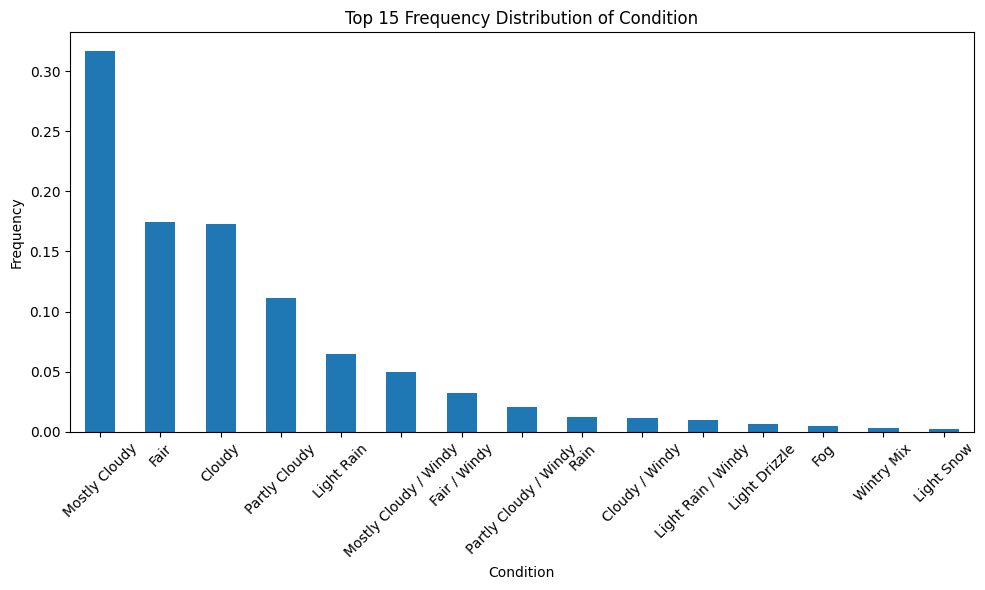

In [ ]:
# Calculate frequency of 'Condition' values
condition_freq = df['Condition'].value_counts(normalize = True)
condition_freq_sorted = condition_freq.sort_values(ascending = False)

# Select top N categories by frequency
top_n = 15
condition_freq_top = condition_freq_sorted.head(top_n)

# Plot top N frequency distribution
plt.figure(figsize = (10, 6))
condition_freq_top.plot(kind = 'bar')
plt.title(f'Top {top_n} Frequency Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# As we can see from the below plot, there is a big difference between bars; while one (Mostly cloudy) has the most frequent numbers, others -I can say- do 
# not. Thus, I cannot use frequency encoding to encode this categorical column as it may introduce bias to the model later on. I should think of another 
# approach for encoding.



In [14]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 870.8 kB/s eta 0:00:00


In [15]:
from category_encoders import LeaveOneOutEncoder

# LeaveOneOutEncoder (LOOE)

In [16]:
# Apply Leave-One-Out Encoder with regularization (Adding random noise)
loo_encoder = LeaveOneOutEncoder(cols = ['Condition'], sigma = 0.05)
df_one['Condition_encoded'] = loo_encoder.fit_transform(df_one['Condition'], df_one['DELAY_NUMERIC'])

In [ ]:
print(df_one['OP_UNIQUE_CARRIER'].unique())

['B6' 'DL' 'AA' 'AS' 'MQ' '9E' 'YX' 'HA' 'OO']


In [ ]:
print(df_one['OP_UNIQUE_CARRIER'].nunique())

9


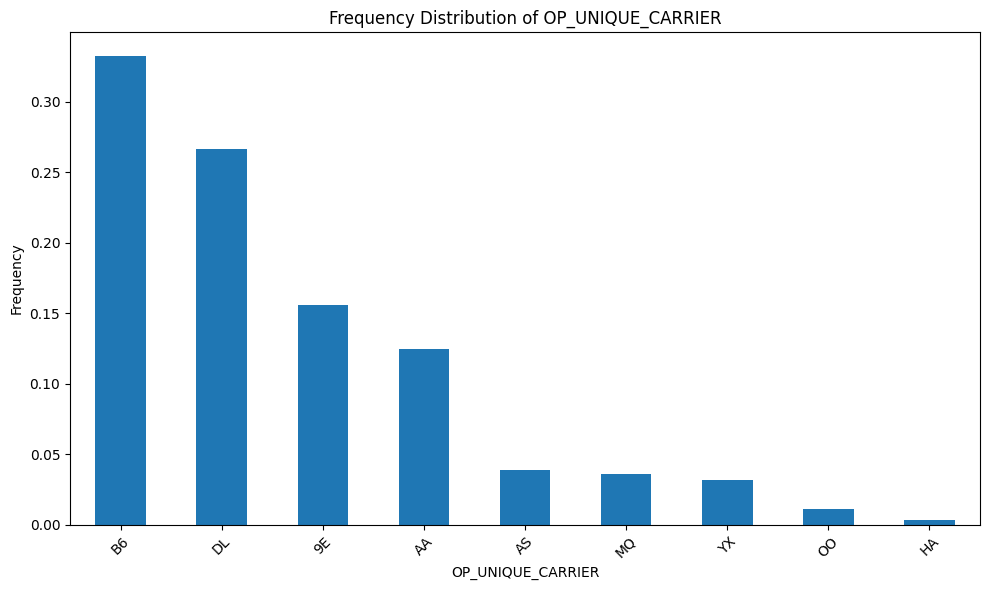

In [ ]:
# Calculate frequency of 'OP_UNIQUE_CARRIER' values
OP_UNIQUE_freq = df_one['OP_UNIQUE_CARRIER'].value_counts(normalize = True)
OP_UNIQUE_freq_sorted = OP_UNIQUE_freq.sort_values(ascending = False)

# Plot top N frequency distribution
plt.figure(figsize = (10, 6))
OP_UNIQUE_freq_sorted.plot(kind = 'bar')
plt.title(f'Frequency Distribution of OP_UNIQUE_CARRIER')
plt.xlabel('OP_UNIQUE_CARRIER')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# For encoding this categorical column I can use both OneHotEncoding/pd.get_dummies(). To my discretion, let's encode it using pd.get_dummies()


# One-Hot-Encoding

In [17]:
# One-hot encode 'OP_UNIQUE_CARRIER' column:
df_one_encoded = pd.get_dummies(df_one, columns = ['OP_UNIQUE_CARRIER'], drop_first = True) # Note that df_one_encoded is a new DataFrame.

In [ ]:
print(df_one_encoded['TAIL_NUM'].unique())

['N828JB' 'N992JB' 'N959JB' ... 'N316NB' 'N976NN' 'N217JQ']


In [ ]:
print(df_one_encoded['TAIL_NUM'].nunique())

2092


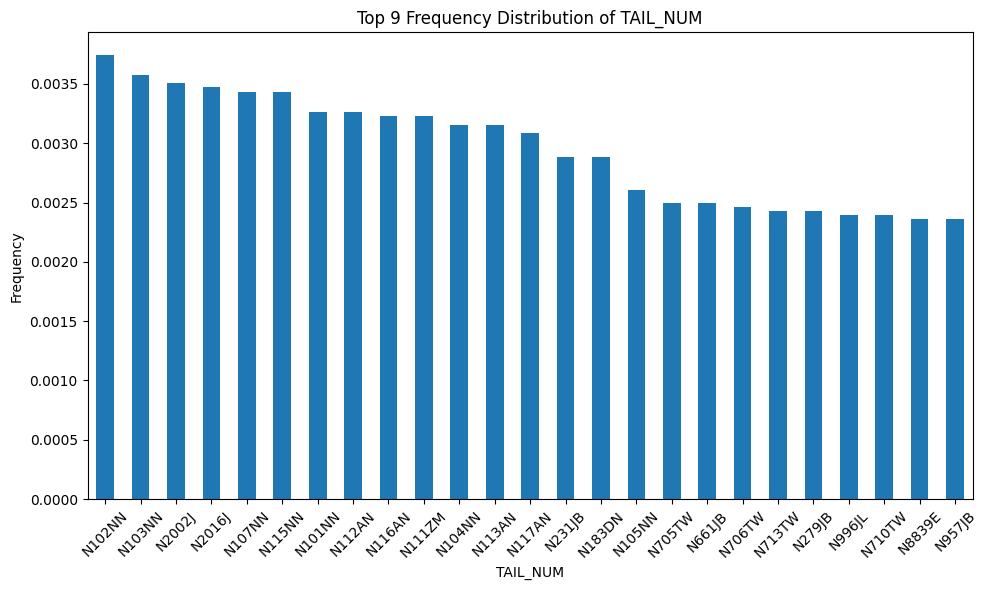

In [ ]:
# Calculate frequency of 'TAIL_NUM' values
dest = df_one_encoded['TAIL_NUM'].value_counts(normalize = True)
dest_freq_sorted = dest.sort_values(ascending = False)

# Select top N categories by frequency
top = 25
dest_frequency_top = dest_freq_sorted.head(top)

# Plot top N frequency distribution
plt.figure(figsize = (10, 6))
dest_frequency_top.plot(kind = 'bar')
plt.title(f'Top {top_n} Frequency Distribution of TAIL_NUM')
plt.xlabel('TAIL_NUM')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [18]:
# Encoding TAIL_NUM Through LOOE:
loo_encoder = LeaveOneOutEncoder(cols = ['TAIL_NUM'], sigma = 0.05)
df_one_encoded['TAIL_NUM_encoded'] = loo_encoder.fit_transform(df_one_encoded['TAIL_NUM'], df_one_encoded['DELAY_NUMERIC'])

In [ ]:
print(df_one_encoded['TAIL_NUM_encoded'].dtypes)

float64


In [ ]:
print(df_one_encoded['TAIL_NUM'].dtypes)

object


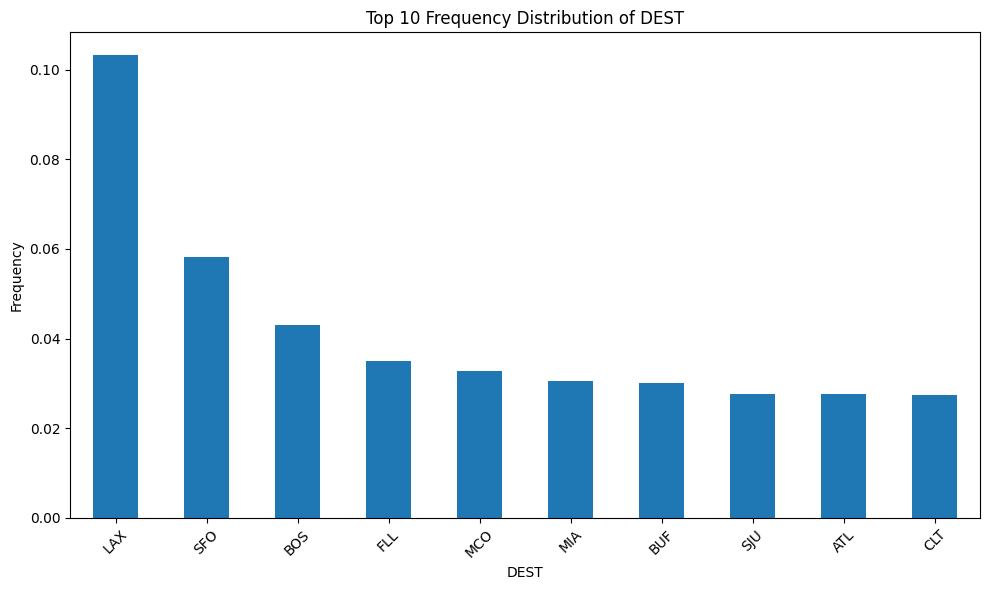

In [ ]:
# Calculate frequency of 'DEST' values
dest_freq = df_one_encoded['DEST'].value_counts(normalize = True)
dest_freq_sorted = dest_freq.sort_values(ascending = False)

# Select top N categories by frequency
top_n = 10
dest_freq_top = dest_freq_sorted.head(top_n)

# Plot top N frequency distribution
plt.figure(figsize = (10, 6))
dest_freq_top.plot(kind = 'bar')
plt.title(f'Top {top_n} Frequency Distribution of DEST')
plt.xlabel('DEST')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [ ]:
print(df_one_encoded["DEST"].nunique())

65


In [19]:
# Encoding DEST Column Through LOOE:
loo_encoder = LeaveOneOutEncoder(cols = ['DEST'], sigma = 0.05)
df_one_encoded['DEST_encoded'] = loo_encoder.fit_transform(df_one_encoded['DEST'], df_one_encoded['DELAY_NUMERIC'])

In [ ]:
print(df_one_encoded['DEST_encoded'].dtypes)

float64


In [ ]:
print(df_one_encoded['Wind'].nunique())

18


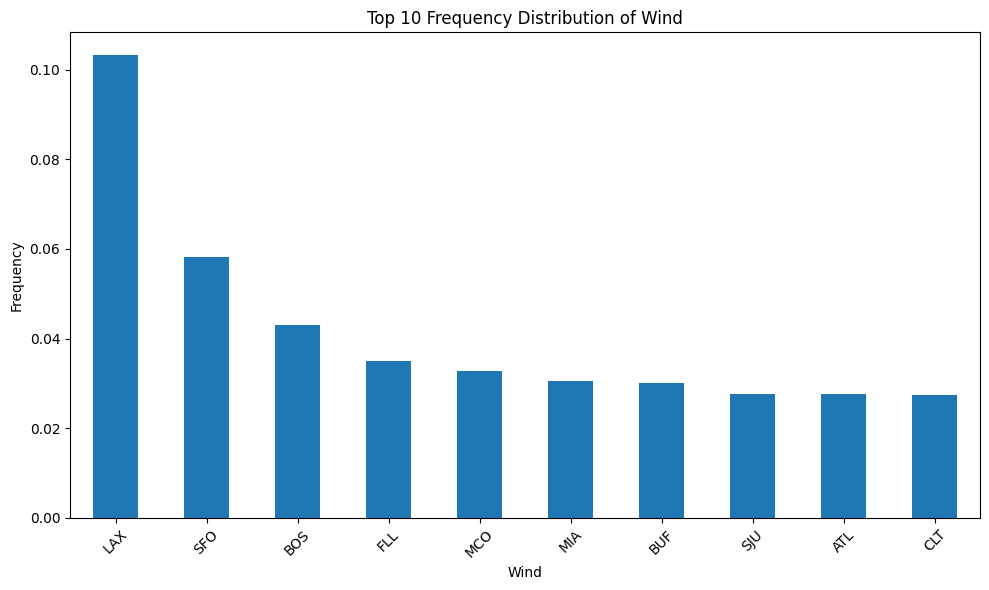

In [ ]:
# Calculate frequency of 'Wind' values
wind_freq = df_one_encoded['Wind'].value_counts(normalize = True)
wind_freq_sorted = wind_freq.sort_values(ascending = False)

# Select top N categories by frequency
top_n = 10
wind_freq_top = wind_freq_sorted.head(top_n)

# Plot top N frequency distribution
plt.figure(figsize = (10, 6))
dest_freq_top.plot(kind = 'bar')
plt.title(f'Top {top_n} Frequency Distribution of Wind')
plt.xlabel('Wind')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [20]:
# Encoding Wind Column Through LOOE:
loo_encoder = LeaveOneOutEncoder(cols = ['Wind'], sigma = 0.05)
df_one_encoded['Wind_encoded'] = loo_encoder.fit_transform(df_one_encoded['Wind'], df_one_encoded['DELAY_NUMERIC'])

In [ ]:
print(df_one_encoded['Wind_encoded'].dtypes)

float64


In [21]:
op_unique_carrier_columns = [col for col in df_one_encoded.columns if 'OP_UNIQUE_CARRIER' in col]
print("One-Hot Encoded OP_UNIQUE_CARRIER columns:", op_unique_carrier_columns)

One-Hot Encoded OP_UNIQUE_CARRIER columns: ['OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_YX']


# Feature Matrix / Y Vector)
In this part, I will define dependent variable (y vector) and independent variables (feature matrix) that are required for the model I am going to develop.

In [22]:
# Here, I select numerical columns I want to include them in the feature matrix:
numerical_columns = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT']

# I select all the encoded, categorical columns in a list and store it in "encoded_categorical_columns" variable.
encoded_categorical_columns = ['Condition_encoded', 'TAIL_NUM_encoded', 'DEST_encoded', 'Wind_encoded']

feature_columns = numerical_columns + encoded_categorical_columns
feature_columns.extend(op_unique_carrier_columns)

# Define the feature matrix using the list of relevant features
x = df_one_encoded[feature_columns].values
y = df_one_encoded['DELAY_NUMERIC']



# Splitting Data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Rescaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 4, min_samples_leaf = 2, oob_score = True, random_state = 42, class_weight = 'balanced')
model.fit(x_train_scaled, y_train)
y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)

# Evaluate model performance on the training set:
precision = precision_score(y_train, y_pred_train, average = 'micro')
recall = recall_score(y_train, y_pred_train, average = 'micro')
f1 = f1_score(y_train, y_pred_train, average = 'micro')

# Evaluate model performance on the test set:
precision = precision_score(y_test, y_pred_test, average = 'micro')
recall = recall_score(y_test, y_pred_test, average = 'micro')
f1 = f1_score(y_test, y_pred_test, average = 'micro')

print(f"Training Precision: {precision:.4f}")
print(f"Training Recall: {recall:.4f}")
print(f"Training F1-Score: {f1:.4f}")

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")



Training Precision: 0.7373
Training Recall: 0.7373
Training F1-Score: 0.7373
Test Precision: 0.7373
Test Recall: 0.7373
Test F1-Score: 0.7373


# Confusion Matrix Evaluation

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_pred_test, y_test)
print("The Confusion Matrix")
print(cm)

The Confusion Matrix
[[  14  252   29    9]
 [  64 3783  198   62]
 [  29  691  144   67]
 [   8  109   54  251]]


# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

# Specifying LogisticRegression with softmax-like behavior since it is not a binary problem:
clf = LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs', class_weight = 'balanced')
clf.fit(x_train_scaled, y_train)
y_pred = clf.predict(x_test_scaled)

precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score:{f1}")

Precision Score: 0.4488202637057599
Recall Score: 0.4488202637057599
F1 Score:0.4488202637057599


In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_pred, y_test)
print("The Confusion Matrix")
print(cm)

The Confusion Matrix
[[  39 1051  108   68]
 [  45 2312  129  108]
 [  20  536   66   62]
 [  27  910  113  170]]


# Dealing with Data Imbalance)
In the last part, I tried to handle imbalanced data through cost-sensitive learning. In this part, however, I am going to fix data imbalance through a specific method, namely SMOTE. The important point to bear in mind is that it is highly recommended to fix data imbalance after splitting the data; this approach ensures that the synthetic samples created by SMOTE do not "leak" into the test set, which could lead to overly optimistic performance estimates.

In [29]:
!pip install imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE

# SMOTE & Random Undersampling

In [33]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

# Class Visualization After Fixing Imbalanced Data

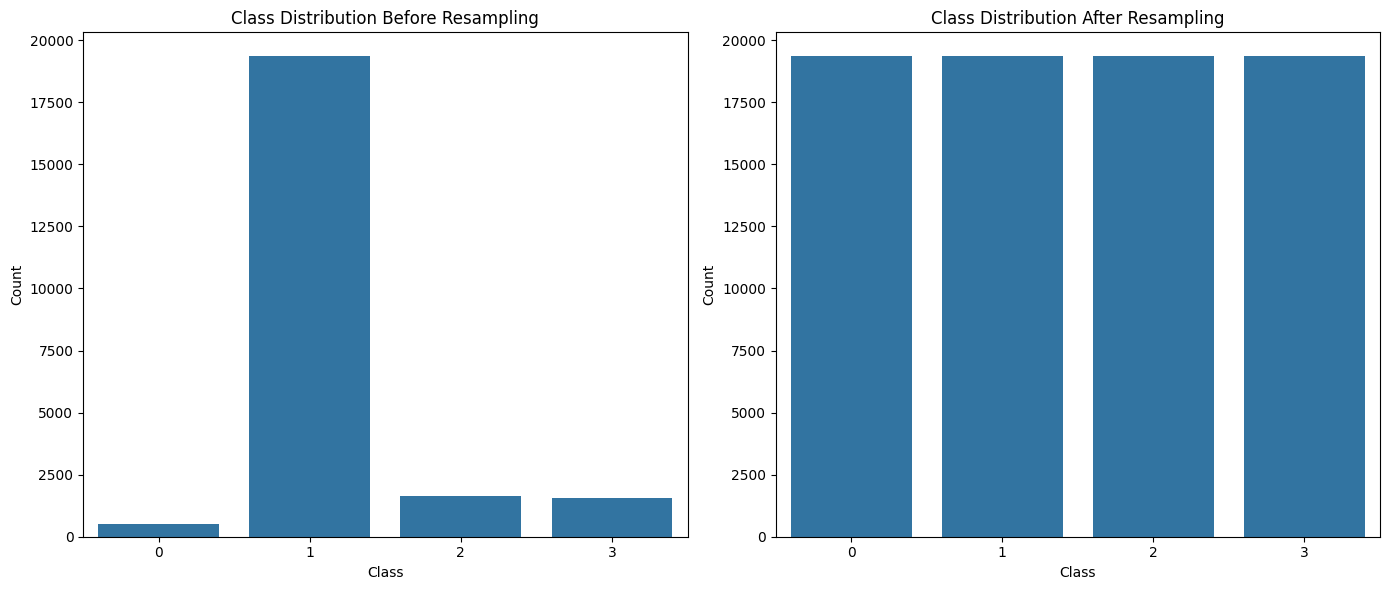

In [34]:
# Before resampling
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# After resampling
plt.subplot(1, 2, 2)
sns.countplot(x = y_resampled)
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# XGBClassifier

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

xgb_clf = XGBClassifier(
    booster = 'gbtree',
    learning_rate = 0.1,
    max_depth = 6,
    min_child_weight = 1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    gamma = 0,
    reg_lambda = 1,
    reg_alpha = 0,
    n_estimators = 100,
    objective = 'multi:softmax',
    random_state = 42,
    eval_metric = 'logloss',
    use_label_encoder = False,
    n_jobs = -1
)

xgb_clf.fit(x_resampled, y_resampled, verbose = True)
y_pred = xgb_clf.predict(x_test_scaled)

print(f1_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(precision_score(y_test, y_pred, average = 'micro'))

# As we can see, after using a different class imbalance method (SMOTE) and applying a totally different algorithm the model's performance tends to 
# increase.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:57:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.8867106176266482
0.8867106176266482
0.8867106176266482
